In [1]:
%pylab inline 
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib

/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


Let's set a seed value, so that we can control our models randomness

In [6]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [61]:
# Set the directory paths, for safekeeping: 

root_dir = os.path.abspath('')
data_dir = os.path.join(root_dir, "Dataset")

# Check for existence 
os.path.exists(root_dir)
os.path.exists(data_dir)


True

### Data Loading and Preprocessing

In [67]:
train = pd.read_csv(os.path.join(data_dir,'Train', 'train.csv'), engine='python')
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'), engine='python')

sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submissions.csv'))

train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


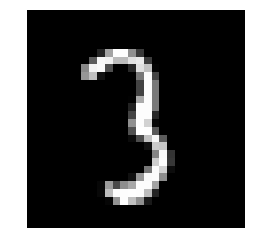

In [69]:
# Read our image and display it
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten = True)

pylab.imshow(img, cmap="gray")
pylab.axis('off')
pylab.show()

In [70]:
# Image as numpy array
img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

For easier data manipulation, let's store all our images as numpy arrays

In [74]:
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten = True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten = True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = train_x.reshape(-1, 784).astype('float32')

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


In [76]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

### Train - Test Split:

In [90]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [91]:
train.label.ix[split_size:]

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


16807    2
16808    5
16809    8
16810    3
16811    1
16812    3
16813    1
16814    5
16815    4
16816    9
16817    6
16818    1
16819    6
16820    3
16821    9
16822    9
16823    6
16824    6
16825    8
16826    9
16827    3
16828    9
16829    0
16830    2
16831    1
16832    1
16833    2
16834    2
16835    2
16836    4
        ..
48970    7
48971    5
48972    0
48973    1
48974    4
48975    1
48976    7
48977    5
48978    6
48979    5
48980    6
48981    3
48982    5
48983    5
48984    9
48985    2
48986    9
48987    0
48988    0
48989    7
48990    0
48991    1
48992    1
48993    6
48994    9
48995    2
48996    4
48997    9
48998    3
48999    0
Name: label, Length: 32193, dtype: int64

In [92]:
val_x.shape

(7203, 784)

In [93]:
val_y.shape

(7203, 10)

### Model Building

Define a neural netwrok with 3 layers input, hidden and output. 
As the input is our 28x28 image it's size is fix and so is outout layer with 10x1 vector representing the class. 
For hidden layer, we'll use [Adam](https://www.quora.com/Can-you-explain-basic-intuition-behind-ADAM-a-method-for-stochastic-optimization) optimisation algorithm. 

In [94]:
# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128
 
from keras.models import Sequential
from keras.layers import Dense

# Create Model
model = Sequential([
    Dense(output_dim = hidden_num_units, input_dim = input_num_units, activation='relu'),
    Dense(output_dim = output_num_units, input_dim = hidden_num_units, activation='softmax'),
])

# Compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", input_dim=784)`
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="softmax", input_dim=50)`
  from ipykernel import kernelapp as app


In [95]:
trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 16807 samples, validate on 7203 samples
Epoch 1/5
16807/16807 [==============================] - 1s 78us/step - loss: 0.7870 - acc: 0.8019 - val_loss: 0.3890 - val_acc: 0.8960
Epoch 2/5
16807/16807 [==============================] - 1s 32us/step - loss: 0.3459 - acc: 0.9044 - val_loss: 0.3075 - val_acc: 0.9146
Epoch 3/5
16807/16807 [==============================] - 1s 30us/step - loss: 0.2860 - acc: 0.9210 - val_loss: 0.2723 - val_acc: 0.9198
Epoch 4/5
16807/16807 [==============================] - 0s 28us/step - loss: 0.2469 - acc: 0.9305 - val_loss: 0.2439 - val_acc: 0.9293
Epoch 5/5
16807/16807 [==============================] - 0s 30us/step - loss: 0.2181 - acc: 0.9390 - val_loss: 0.2258 - val_acc: 0.9323
